In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook

## Cargar csv

In [5]:
file = "data/CARDIOLOGIA DF_H.csv"
originaldf = pd.read_csv(file)
#print(originaldf.head())
originaldf.isin(['NaN']).any()

NUMERO                             False
DIA                                False
MES                                False
AÑO                                False
INICIO                             False
TERMINO                            False
GENERO                             False
EDAD                               False
PESO                               False
TALLA                              False
IMC                                False
EXPEDIENTE                         False
DIAGNOSTICO 1                      False
DIAGNOSTICO 2                      False
DIAGNOSTICO 3                      False
DIAGNOSTICO 4                      False
PROCEDIMIENTO                      False
CORONARIOGRAFIA                    False
VENTRICULOGRAMA                    False
AORTOGRAMA                         False
ACTP                               False
EXTRACCION TROMBO                  False
ARTERIOGRAFIA RENALES              False
CATETERISMO           DER - IZQ    False
GASOMETRIAS     

Lo siguiente busca todos los registros de la columna IMC

In [6]:
print(len(originaldf))
originaldf.loc[:,'IMC']
#float(originaldf.loc[5,'DIA'])*5 > 10

593


0      28.125000
1      27.600000
2      24.034610
3      39.792388
4      25.826446
         ...    
588    50.781250
589    30.486657
590    26.703624
591    48.059808
592    25.788534
Name: IMC, Length: 593, dtype: float64

In [7]:
imcateg=[]

for i in range(len(originaldf)):
    if float(originaldf.loc[i,'IMC']) < 18.5 :
        imcateg.append('B')
    elif float(originaldf.loc[i,'IMC']) <= 25:
        imcateg.append('N')
    elif float(originaldf.loc[i,'IMC']) <= 30:
        imcateg.append('S')
    else:
        imcateg.append('O')

originaldf['IMC_categorico'] = imcateg
originaldf

,NUMERO,DIA,MES,AÑO,INICIO,TERMINO,GENERO,EDAD,PESO,TALLA,...,VIA DE ACCESO 2,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONSECUTIVO,CONTRASTE,IMC_categorico
0,1,1,3,2018,11:55,13:15,0,75,72.0,1.60,...,NaN,3.25,85.0,4209.9,3,7.5,15.0,6405,0,S
1,2,1,3,2018,19:00,20:00,0,49,78.0,1.68,...,NaN,7.60,1301.0,8858.6,18,7.5,15.0,6406,120,S
2,3,5,3,2018,17:00,19:00,1,78,60.0,1.58,...,NaN,10.04,128.0,6979.5,5,7.5,15.0,6407,0,N
3,4,6,3,2018,17:00,19:16,0,48,115.0,1.70,...,NaN,30.60,1906.0,22416.8,13,7.5,15.0,6410,230,O
4,5,7,3,2018,9:20,10:10,1,81,80.0,1.76,...,NaN,2.45,206.0,1026.5,11,7.5,15.0,6411,100,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,589,25,2,2019,9:10,12:15,0,60,130.0,1.60,...,NaN,20.09,1683.0,21024.0,13,7.5,15.0,7192,150,O
589,590,25,2,2019,12:58,13:22,0,62,81.0,1.63,...,NaN,4.17,429.0,2296.0,12,7.5,15.0,7193,95,O
590,591,25,2,2019,13:35,14:15,0,55,79.0,1.72,...,NaN,4.14,862.0,2729.4,16,7.5,15.0,7194,225,S
591,592,26,2,2019,17:50,19:00,1,63,54.0,1.06,...,F+D,9.90,442.0,3740.4,19,7.5,15.0,7197,130,O


In [8]:
#data = pd.read_csv(file, usecols={'EDAD','PESO', 'GENERO','TALLA', 'TIEMPO','mGy','pGym','IMÁGENES','CUADROS POR SEGUNDO','PULSOS POR SEGUNDO', 'CONTRASTE'})
#df = pd.read_csv(file, 
#                   usecols={'EDAD','PESO', 'TALLA',
#                            'TIEMPO','mGy','pGym', 'IMÁGENES'})
#df = pd.read_csv(file, 
#                 usecols={'TIEMPO','mGy', 
#                                  'IMÁGENES', 'CUADROS POR SEGUNDO', 'CONTRASTE'})
df = originaldf.loc[:,['TIEMPO','mGy',\
                                  'IMÁGENES', 'CONTRASTE']]
df.head()

,TIEMPO,mGy,IMÁGENES,CONTRASTE
0,3.25,85.0,3,0
1,7.60,1301.0,18,120
2,10.04,128.0,5,0
3,30.60,1906.0,13,230
4,2.45,206.0,11,100


### Probando si hay valores nulos:

In [9]:
type(df)
df.isin(['NaN']).any()

TIEMPO       False
mGy          False
IMÁGENES     False
CONTRASTE    False
dtype: bool

In [10]:
df_val = df.values
len(df_val)

593

<IPython.core.display.Javascript object>


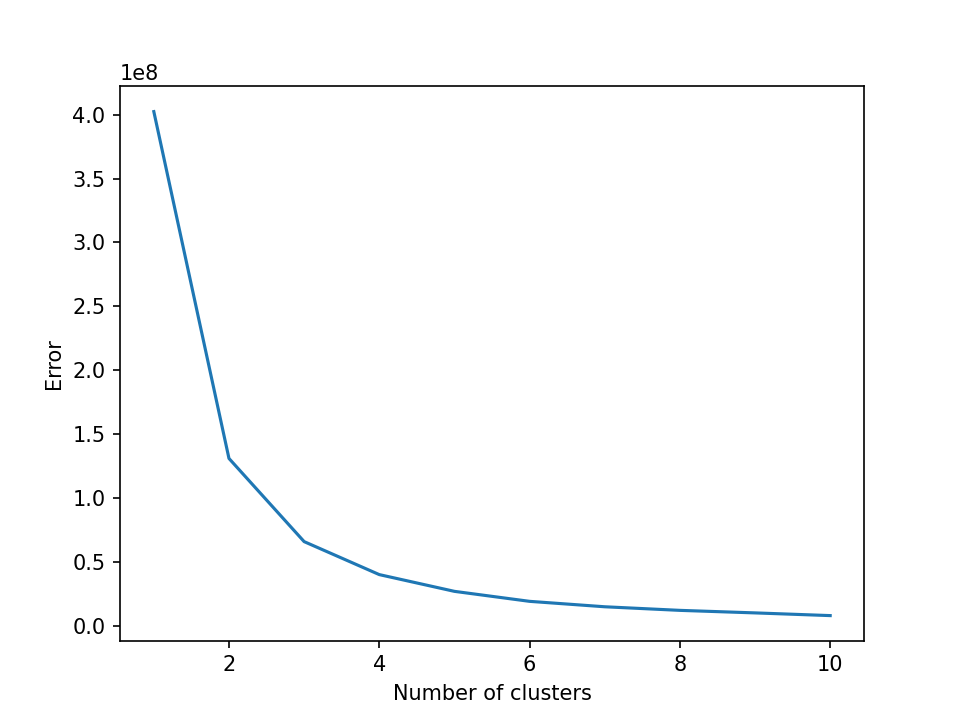

In [26]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_val)
    kmeans.fit(df_val)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
#plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.savefig("elbow")
plt.show()

In [14]:
k_clusters = 4

kmeans = KMeans(n_clusters = k_clusters)
y_kmeans = kmeans.fit_predict(df_val)
print(y_kmeans)

kmeans.cluster_centers_


[0 2 0 3 0 0 0 0 0 2 2 0 2 2 2 2 0 0 0 0 2 3 3 2 2 3 0 2 3 2 0 0 1 3 0 2 3
 2 0 0 2 0 0 1 0 3 3 0 0 2 2 0 2 0 0 0 0 2 0 0 2 0 0 0 2 3 2 2 2 0 2 0 0 3
 2 0 0 0 0 0 0 0 0 3 3 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 3 2 0 0 3 0 0 0
 0 0 0 0 0 1 3 0 2 2 0 2 0 2 0 1 0 1 0 0 2 0 0 2 3 3 0 0 2 0 3 0 0 0 0 0 0
 0 0 2 2 2 0 0 0 3 0 0 3 0 0 3 3 2 0 0 2 3 0 2 0 0 0 3 3 2 0 2 2 3 3 0 0 2
 2 0 2 0 0 0 0 0 3 0 0 0 1 0 2 0 2 3 0 0 0 0 1 3 0 2 2 0 2 0 0 1 0 0 2 2 3
 0 0 3 2 0 0 0 2 2 2 0 2 0 3 2 3 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2
 0 0 0 0 2 2 2 2 2 0 3 2 0 0 0 2 2 2 2 2 0 2 0 0 0 2 3 0 0 0 0 0 0 0 3 0 2
 0 0 0 2 1 3 0 0 2 0 0 2 0 0 2 0 0 3 0 2 0 0 2 2 0 0 0 0 0 3 0 0 0 0 3 0 0
 3 0 0 0 0 2 0 0 0 0 0 3 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 2 0 3 0 0 2 0
 3 3 0 0 0 0 3 2 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 0 3 0 0 0 2 0 0 0 2 0 2 0
 2 0 2 0 0 2 0 2 2 3 0 0 2 3 0 3 2 0 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0 0 0 0 2
 0 0 0 3 3 2 3 0 0 3 0 3 2 1 3 0 0 0 0 2 0 0 0 0 0 3 1 2 0 2 3 2 2 2 0 3 0
 0 0 0 0 2 0 0 2 2 0 3 0 

array([[   5.62341808,  281.31186441,    9.80225989,   48.17514124],
       [  31.03866667, 3693.2       ,   38.66666667,  260.46666667],
       [  11.91694805, 1065.84935065,   19.99350649,  120.94805195],
       [  21.36614286, 2155.48571429,   27.74285714,  179.07142857]])

In [15]:
lista = list(df)
centroidestxt = open('centroides.txt', 'w')
print(lista)
centroidestxt.write(str(lista))
centroidestxt.write("\n")
for i, item in enumerate(kmeans.cluster_centers_):
    print("Centro del centroide No {} es: \n {} \n".format(i+1, item))
    centroidestxt.write("Centro del centroide No {} es: \n {} \n".format(i+1, item))

centroidestxt.close()

['TIEMPO', 'mGy', 'IMÁGENES', 'CONTRASTE']
Centro del centroide No 1 es: 
 [  5.62341808 281.31186441   9.80225989  48.17514124] 

Centro del centroide No 2 es: 
 [  31.03866667 3693.2          38.66666667  260.46666667] 

Centro del centroide No 3 es: 
 [  11.91694805 1065.84935065   19.99350649  120.94805195] 

Centro del centroide No 4 es: 
 [  21.36614286 2155.48571429   27.74285714  179.07142857] 



In [16]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

clusterlist = []

for i in range(k_clusters):
    clusterlist.append(cluster_map[cluster_map.cluster == i])
    print("Elementos en cluster {} : {}".format(i+1, len(clusterlist[i])))
    index_elements = clusterlist[i]['data_index']
    clusterlist[i]['data_index'].to_csv('indices_cluster_'+str(i+1)+'.txt', 
                                  header=True, index=None, sep='\n')
#cluster1 = cluster_map[cluster_map.cluster == 0]
#cluster2 = cluster_map[cluster_map.cluster == 1]
#cluster3 = cluster_map[cluster_map.cluster == 2]
#cluster4 = cluster_map[cluster_map.cluster == 3]

Elementos en cluster 1 : 353
Elementos en cluster 2 : 15
Elementos en cluster 3 : 155
Elementos en cluster 4 : 70


In [17]:
clusterlist[0]['data_index']

0        0
2        2
4        4
5        5
6        6
      ... 
582    582
587    587
589    589
591    591
592    592
Name: data_index, Length: 353, dtype: int64

In [18]:
clusterlist[1]['data_index']

32      32
43      43
116    116
126    126
128    128
197    197
207    207
216    216
300    300
383    383
390    390
457    457
470    470
527    527
544    544
Name: data_index, dtype: int64

In [19]:
clusterlist[2]['data_index']

1        1
9        9
10      10
12      12
13      13
      ... 
581    581
584    584
585    585
586    586
590    590
Name: data_index, Length: 155, dtype: int64

In [20]:
clusterlist[3]['data_index']
type(clusterlist[3]['data_index'])
list(clusterlist[3]['data_index'])


[3,
 21,
 22,
 25,
 28,
 33,
 36,
 45,
 46,
 65,
 73,
 83,
 84,
 103,
 107,
 117,
 135,
 136,
 141,
 156,
 159,
 162,
 163,
 168,
 174,
 175,
 180,
 181,
 193,
 202,
 208,
 221,
 224,
 235,
 237,
 269,
 285,
 293,
 301,
 313,
 325,
 330,
 333,
 344,
 365,
 370,
 371,
 376,
 395,
 416,
 420,
 422,
 447,
 448,
 450,
 453,
 455,
 458,
 469,
 474,
 479,
 491,
 493,
 494,
 524,
 529,
 566,
 579,
 583,
 588]

In [22]:
clusternumbers = []


for i in range(len(originaldf)):
    if int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[0]['data_index']):
        clusternumbers.append(1)
    elif int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[1]['data_index']):
        clusternumbers.append(2)
    elif int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[2]['data_index']):
        clusternumbers.append(3)
    elif int(originaldf.loc[i,'NUMERO'])-1 in list(clusterlist[3]['data_index']):
        clusternumbers.append(4)


originaldf['Cluster No'] = clusternumbers
originaldf.to_csv("data/cardio_clean_clustering_IMC.csv", sep = ",")
originaldf

,NUMERO,DIA,MES,AÑO,INICIO,TERMINO,GENERO,EDAD,PESO,TALLA,...,TIEMPO,mGy,pGym,IMÁGENES,CUADROS POR SEGUNDO,PULSOS POR SEGUNDO,CONSECUTIVO,CONTRASTE,IMC_categorico,Cluster No
0,1,1,3,2018,11:55,13:15,0,75,72.0,1.60,...,3.25,85.0,4209.9,3,7.5,15.0,6405,0,S,1
1,2,1,3,2018,19:00,20:00,0,49,78.0,1.68,...,7.60,1301.0,8858.6,18,7.5,15.0,6406,120,S,3
2,3,5,3,2018,17:00,19:00,1,78,60.0,1.58,...,10.04,128.0,6979.5,5,7.5,15.0,6407,0,N,1
3,4,6,3,2018,17:00,19:16,0,48,115.0,1.70,...,30.60,1906.0,22416.8,13,7.5,15.0,6410,230,O,4
4,5,7,3,2018,9:20,10:10,1,81,80.0,1.76,...,2.45,206.0,1026.5,11,7.5,15.0,6411,100,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,589,25,2,2019,9:10,12:15,0,60,130.0,1.60,...,20.09,1683.0,21024.0,13,7.5,15.0,7192,150,O,4
589,590,25,2,2019,12:58,13:22,0,62,81.0,1.63,...,4.17,429.0,2296.0,12,7.5,15.0,7193,95,O,1
590,591,25,2,2019,13:35,14:15,0,55,79.0,1.72,...,4.14,862.0,2729.4,16,7.5,15.0,7194,225,S,3
591,592,26,2,2019,17:50,19:00,1,63,54.0,1.06,...,9.90,442.0,3740.4,19,7.5,15.0,7197,130,O,1


In [23]:
#conteo_proc = [[0s c1,1s c1],[0s c2,1s c2],[0s c3,1s c3],[0s c4,1s c4]]
conteo_proc = [[0,0],[0,0],[0,0],[0,0]]
for i in range(len(originaldf)):
    if originaldf.loc[i,'PROCEDIMIENTO'] == 0:
        if originaldf.loc[i,'Cluster No'] == 1:
            conteo_proc[0][0]+=1
        elif originaldf.loc[i,'Cluster No'] == 2:
            conteo_proc[1][0]+=1
        elif originaldf.loc[i,'Cluster No'] == 3:
            conteo_proc[2][0]+=1
        elif originaldf.loc[i,'Cluster No'] == 4:
            conteo_proc[3][0]+=1
    else:
        if originaldf.loc[i,'Cluster No'] == 1:
            conteo_proc[0][1]+=1
        elif originaldf.loc[i,'Cluster No'] == 2:
            conteo_proc[1][1]+=1
        elif originaldf.loc[i,'Cluster No'] == 3:
            conteo_proc[2][1]+=1
        elif originaldf.loc[i,'Cluster No'] == 4:
            conteo_proc[3][1]+=1

In [24]:
for i, item in enumerate(conteo_proc):
    print("""Para el cluster {} hay:
            {} elementos con procedimiento 0 y 
            {} con procedimiento 1 \n""".format(i+1, conteo_proc[i][0],conteo_proc[i][1]))

Para el cluster 1 hay:
            199 elementos con procedimiento 0 y 
            154 con procedimiento 1 

Para el cluster 2 hay:
            0 elementos con procedimiento 0 y 
            15 con procedimiento 1 

Para el cluster 3 hay:
            62 elementos con procedimiento 0 y 
            93 con procedimiento 1 

Para el cluster 4 hay:
            6 elementos con procedimiento 0 y 
            64 con procedimiento 1 



In [29]:
values = kmeans.cluster_centers_.squeeze()
values

array([[5.63151724e+00, 3.00647241e+02, 1.14068966e+01, 5.67103448e+01],
       [1.90797368e+01, 1.88655263e+03, 2.42368421e+01, 1.54000000e+02],
       [7.09200000e+00, 5.81433913e+02, 1.41739130e+01, 8.37913043e+01],
       [4.13750000e+01, 5.01350000e+03, 5.15000000e+01, 4.00000000e+02],
       [1.19037838e+01, 9.66864865e+02, 1.91891892e+01, 1.12351351e+02],
       [3.74616667e+01, 3.87800000e+03, 4.11666667e+01, 2.78333333e+02],
       [2.39433333e+01, 2.44720000e+03, 3.22000000e+01, 2.14766667e+02],
       [1.33687500e+01, 1.34346429e+03, 2.30892857e+01, 1.46017857e+02],
       [2.33733333e+01, 3.09800000e+03, 3.16666667e+01, 1.86333333e+02],
       [4.78152542e+00, 5.49529661e+01, 4.67796610e+00, 1.12711864e+01]])

In [31]:
labels = kmeans.labels_
labels

array([9, 7, 9, 1, 0, 0, 0, 9, 9, 4, 7, 9, 2, 7, 2, 2, 9, 0, 0, 0, 4, 1,
       6, 7, 2, 1, 2, 2, 6, 7, 2, 9, 8, 6, 0, 2, 6, 7, 9, 0, 4, 2, 0, 5,
       2, 1, 6, 0, 9, 4, 7, 9, 7, 2, 0, 0, 2, 4, 9, 9, 4, 0, 0, 2, 4, 1,
       4, 7, 4, 2, 7, 9, 0, 1, 7, 0, 2, 9, 2, 9, 9, 0, 9, 6, 6, 9, 4, 0,
       9, 4, 2, 0, 0, 0, 0, 9, 0, 4, 0, 9, 0, 4, 2, 1, 4, 2, 2, 6, 0, 0,
       0, 9, 9, 2, 0, 9, 8, 1, 2, 2, 4, 9, 7, 2, 7, 0, 5, 0, 8, 0, 0, 7,
       2, 0, 7, 1, 1, 0, 0, 4, 0, 1, 0, 0, 9, 9, 9, 2, 9, 0, 4, 7, 4, 0,
       2, 9, 6, 9, 9, 1, 9, 2, 6, 6, 7, 2, 9, 4, 1, 2, 7, 2, 9, 0, 1, 6,
       2, 9, 7, 4, 1, 6, 2, 0, 7, 7, 0, 4, 9, 9, 2, 2, 0, 6, 9, 0, 2, 5,
       9, 2, 9, 2, 1, 0, 0, 0, 9, 8, 6, 0, 4, 4, 0, 4, 0, 0, 8, 0, 0, 7,
       7, 1, 0, 0, 1, 4, 0, 0, 9, 4, 2, 2, 2, 2, 0, 1, 4, 1, 2, 2, 2, 7,
       7, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 9, 4, 9, 9, 9, 0, 7,
       7, 2, 4, 2, 9, 6, 7, 0, 0, 0, 7, 4, 7, 4, 7, 2, 4, 0, 2, 9, 4, 1,
       2, 2, 9, 2, 2, 9, 9, 1, 2, 4, 0, 9, 9, 2, 5,

In [33]:
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

ValueError: shape mismatch: objects cannot be broadcast to a single shape